In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('C:/Users/ADMIN/Desktop/Dissertation - Eth/Data/Bitcoin 3 Year prices.csv')

In [4]:
data.shape

(1097, 7)

In [5]:
data = data.set_index(pd.DatetimeIndex(data['Date'].values))
data.head()

,Date,Close,Open,High,Low,Vol.,Change %
2019-08-15,"Aug 15, 2019",10303.4,10053.3,10448.2,9580.1,930.05K,2.53%
2019-08-16,"Aug 16, 2019",10335.6,10300.9,10734.0,9788.6,798.67K,0.31%
2019-08-17,"Aug 17, 2019",10218.1,10335.5,10460.7,10016.3,497.77K,-1.14%
2019-08-18,"Aug 18, 2019",10312.7,10219.3,10494.9,10086.7,441.11K,0.93%
2019-08-19,"Aug 19, 2019",10910.7,10312.8,10923.9,10267.8,519.01K,5.80%


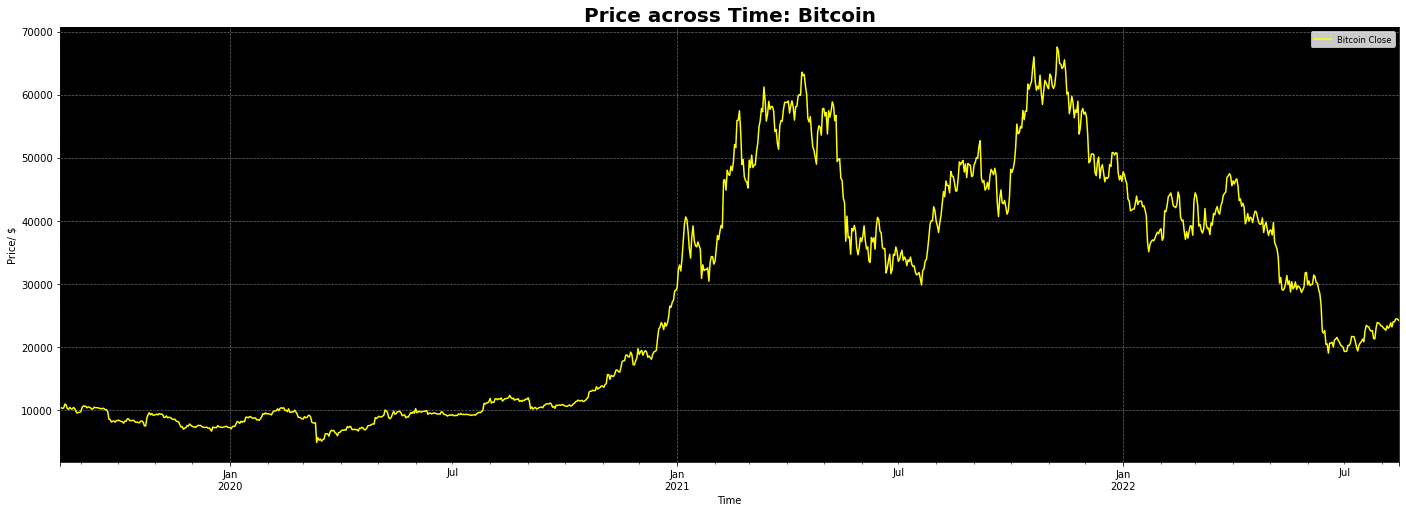

In [6]:
data.Close.plot(color='yellow', figsize=(24,8), label=f'Bitcoin Close')

# Formating Graph
ax = plt.axes()
ax.set_facecolor('xkcd:black')
ax.grid(color='dimgrey', linestyle='--', linewidth=0.7)

# labeling the graph neatly
plt.xlabel('Time')
plt.ylabel('Price/ $')
plt.title(f'Price across Time: Bitcoin',  fontsize= 20, fontweight='bold')
plt.legend(loc='best', fontsize='small')

# Data Preparation

In [34]:
future_days = 100

In [35]:
# Create a new column
data[str(future_days)+'_Day_Price_Forecast'] = data[['Close']].shift(-future_days)

# Show the data
data[['Close',str(future_days)+'_Day_Price_Forecast']]

,Close,100_Day_Price_Forecast
2019-08-15,10303.4,7324.1
2019-08-16,10335.6,6924.7
2019-08-17,10218.1,7115.6
2019-08-18,10312.7,7162.8
2019-08-19,10910.7,7510.6
...,...,...
2022-08-11,23935.3,NaN
2022-08-12,24398.7,NaN
2022-08-13,24442.5,NaN
2022-08-14,24302.8,NaN


In [36]:
X = np.array(data[['Close']])
X = X[:data.shape[0]-future_days]
print(X)

[[10303.4]
 [10335.6]
 [10218.1]
 [10312.7]
 [10910.7]
 [10752.6]
 [10141.5]
 [10105. ]
 [10388.7]
 [10131. ]
 [10136.3]
 [10371.8]
 [10184.8]
 [ 9729.4]
 [ 9491. ]
 [ 9585.4]
 [ 9594.4]
 [ 9729.3]
 [10348.8]
 [10612.3]
 [10568.2]
 [10566.9]
 [10309.3]
 [10461.1]
 [10402.8]
 [10309. ]
 [10105.4]
 [10162.5]
 [10415.1]
 [10342.1]
 [10337.3]
 [10311.5]
 [10255.5]
 [10195.7]
 [10164.7]
 [10250.5]
 [10172.7]
 [ 9993. ]
 [10031.6]
 [ 9702.2]
 [ 8513.9]
 [ 8432.4]
 [ 8063.8]
 [ 8184.9]
 [ 8208.5]
 [ 8049.1]
 [ 8284.3]
 [ 8302.7]
 [ 8364.1]
 [ 8226.9]
 [ 8148.1]
 [ 8127.3]
 [ 7881.9]
 [ 8198.6]
 [ 8182.9]
 [ 8566.7]
 [ 8562.3]
 [ 8267.8]
 [ 8304.4]
 [ 8281.5]
 [ 8353.3]
 [ 8167.2]
 [ 8000.4]
 [ 8073.3]
 [ 7948.5]
 [ 7957.3]
 [ 8223.4]
 [ 8208.2]
 [ 8031.4]
 [ 7477. ]
 [ 7422.7]
 [ 8658.3]
 [ 9230.6]
 [ 9529.6]
 [ 9207.2]
 [ 9411.3]
 [ 9157.9]
 [ 9152.6]
 [ 9230.1]
 [ 9300.6]
 [ 9198.3]
 [ 9396.4]
 [ 9310.8]
 [ 9338.9]
 [ 9223.5]
 [ 8778.2]
 [ 8804.5]
 [ 9036.8]
 [ 8736.9]
 [ 8812.6]
 [ 8783.1]

In [37]:
y = np.array(data[str(future_days)+'_Day_Price_Forecast'])
y = y[:-future_days]
print(y)

[ 7324.1  6924.7  7115.6  7162.8  7510.6  7426.7  7742.7  7546.6  7396.4
  7298.2  7291.8  7204.4  7399.2  7530.8  7510.9  7524.4  7355.8  7235.7
  7208.   7208.   7255.2  7080.8  7128.5  6903.5  6613.3  7276.   7165.5
  7196.4  7156.2  7495.8  7322.8  7268.3  7224.8  7210.9  7261.7  7321.5
  7397.5  7261.8  7196.4  7199.8  6967.   7343.1  7376.8  7372.5  7759.1
  8155.7  8059.6  7842.4  8187.1  8024.1  8187.6  8111.4  8829.2  8818.3
  8726.9  8913.1  8916.3  8706.2  8641.9  8732.6  8678.5  8405.1  8439.9
  8341.6  8607.8  8866.6  9377.3  9298.9  9507.3  9349.1  9381.6  9334.9
  9296.6  9193.9  9611.8  9772.   9818.6  9895.5 10151.5  9854.1 10229.5
 10317.7 10235.1 10333.   9907.7  9932.3  9701.4 10158.4  9609.4  9602.4
  9684.5  9655.7  9942.7  9662.7  9317.2  8800.3  8818.6  8697.5  8543.7
  8540.   8904.8  8761.4  8757.9  9060.3  9134.8  8887.8  8034.1  7933.
  7891.2  7935.1  4826.   5584.3  5182.7  5366.3  5030.   5261.1  5361.4
  6172.   6205.3  6186.2  5822.1  6468.9  6744.6  66

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [39]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=1e3, gamma = 0.00001)
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, gamma=1e-05)

In [46]:
svr_rbf_confidence = svr_rbf.score(x_test, y_test)
print('svr_rbf accuracy:', svr_rbf_confidence)

svr_rbf accuracy: 0.6433629052179382


In [41]:
svm_prediction = svr_rbf.predict(x_test)
print(svm_prediction)

[39196.85145293 34461.23415033 20734.61382014 32591.03281932
 31754.56439496 35237.40095958 38958.62802557 39331.56777292
 34280.6854326  37741.37114775 38876.57061613 33938.53811151
 36036.88010091 40267.31137871 36922.79521059 29759.99100894
 35943.5382971  12250.94567114 15246.97427186  8823.56474732
 33937.1956487  36067.30319425 11363.58552831 32765.01653046
 33204.6477901  31879.72095156 34146.39944263 33958.81837978
 39968.65878855 36858.9435063  20732.22856964 37995.39150277
 10930.00248175 36346.38954375 22228.02954677 32614.08025433
 34445.59313118 33822.54849593 10775.28273925 10342.76497789
 34764.67205234 36685.90312229 39009.35717303 33076.08770976
 37483.15971483 11456.01927161 31177.90436272 32387.07741598
 35688.27203012 37713.17785742 11504.39262202 11352.24581389
 36842.40512227 10979.17113025 37029.86514655 20746.93110558
 40657.83318609 20079.13562553 32421.70855151 38733.15287178
  8835.15215894 36714.06966353 33407.2201062  41122.10294792
 29996.08510215 33013.67

In [42]:
print(y_test)

[55848.9 35662.5 17127.1 28976.  27057.8 33543.6 24442.5 64278.5 41503.
 46407.  53783.9 38248.2 36950.6 20250.  52079.2 23215.2 55923.7  9134.8
  8034.1  7759.1 33510.6 38744.8  9425.4 41546.7 31308.7 15303.6 57337.2
 47936.3 43901.  48200.1 18412.9 40001.4  9454.8 35834.7 22728.5 22157.3
 37646.8 40552.8 10317.7 11764.3 42392.2 57383.8 51322.3 40651.3 43823.3
  9818.6  9256.  26606.3 37298.6 42203.4 19273.8 11390.4 35815.4 11913.5
 46703.6  7156.2 51768.6  6613.3 36845.8 62980.4  6857.4 41848.3 15587.1
 42172.6 19965.8 24689.6 11054.2 58840.1 21100.7 31840.5  8024.1 39452.
 40078.  35839.6 42205.2 19698.1 42275.  39936.  19262.9 43883.6 56496.
 57477.3 28868.7 15577.9 36009.  38461.   8187.1 53741.5 47449.   9387.3
  6735.9  9379.5  9684.5 29178.6 21489.9  7289.  49999.  50562.1 50088.9
 39416.3  7080.8 39703.   9296.4 46136.7 11889.2 38417.3  8629.  46991.3
 14145.6 30286.6 42233.  40914.8 30305.9  9742.6 18658.1 49324.   7235.7
  7165.5  7085.6 14828.4 13278.9 10333.   6412.5 33674

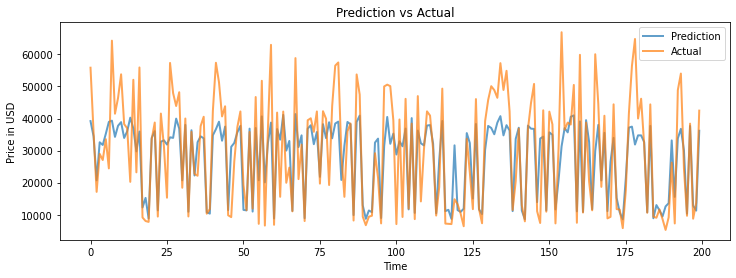

In [43]:
plt.figure(figsize=(12,4))
plt.plot(svm_prediction, label = 'Prediction', lw=2, alpha=0.7)
plt.plot(y_test, label='Actual', lw=2, alpha=0.7)
plt.title('Prediction vs Actual')
plt.ylabel('Price in USD')
plt.xlabel('Time')
plt.legend()

In [44]:
import math
from sklearn.metrics import mean_squared_error

In [47]:
math.sqrt(mean_squared_error(svm_prediction, y_test))

10314.983872105588

In [48]:
from sklearn.metrics import mean_absolute_error as mae
error = mae(y_test, svm_prediction)
print("Mean absolute error : " + str(error))

Mean absolute error : 7464.435955889074


In [50]:
from sklearn.metrics import mean_absolute_percentage_error as MAPE
error_MAPE= MAPE(y_test, svm_prediction)
print("MAPE: ", error_MAPE)

MAPE:  0.33093404022628603


In [52]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

error2 = mean_absolute_percentage_error(y_test, svm_prediction)
print("MAPE: ", error2)

MAPE:  33.093404022628604
